In [12]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


y = 0 T-shirt/top


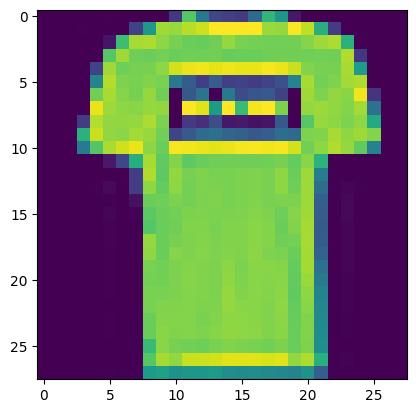

In [13]:
fashion_mnist_labels = ["T-shirt/top",  #  0
                        "Trouser",      #  1
                        "Pullover",     #  2
                        "Dress",        #  3
                        "Coat",         #  4
                        "Sandal",       #  5
                        "Shirt",        #  6
                        "Sneaker",      #  7
                        "Bag",          #  8
                        "Ankle boot"]   #  9

img_index = 1
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

In [14]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [15]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [16]:
# 5000 в валідаційний сет, решта 55,000 в тренувальний
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# (28, 28) -> (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


In [17]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)         

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5990 - accuracy: 0.7800
Epoch 1: val_loss improved from inf to 0.37944, saving model to model.weights.best.hdf5
860/860 [==============================] - 65s 74ms/step - loss: 0.5991 - accuracy: 0.7799 - val_loss: 0.3794 - val_accuracy: 0.8652
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.4114 - accuracy: 0.8494
Epoch 2: val_loss improved from 0.37944 to 0.31826, saving model to model.weights.best.hdf5
860/860 [==============================] - 66s 76ms/step - loss: 0.4113 - accuracy: 0.8494 - val_loss: 0.3183 - val_accuracy: 0.8874
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3658 - accuracy: 0.8665
Epoch 3: val_loss improved from 0.31826 to 0.29976, saving model to model.weights.best.hdf5
860/860 [==============================] - 63s 74ms/step - loss: 0.3659 - accuracy: 0.8665 - val_loss: 0.2998 - val_accuracy: 0.8916
Epoch 4/10
859/860 [=====================

In [20]:
model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9117000102996826


313/313 [==============================] - 5s 15ms/step


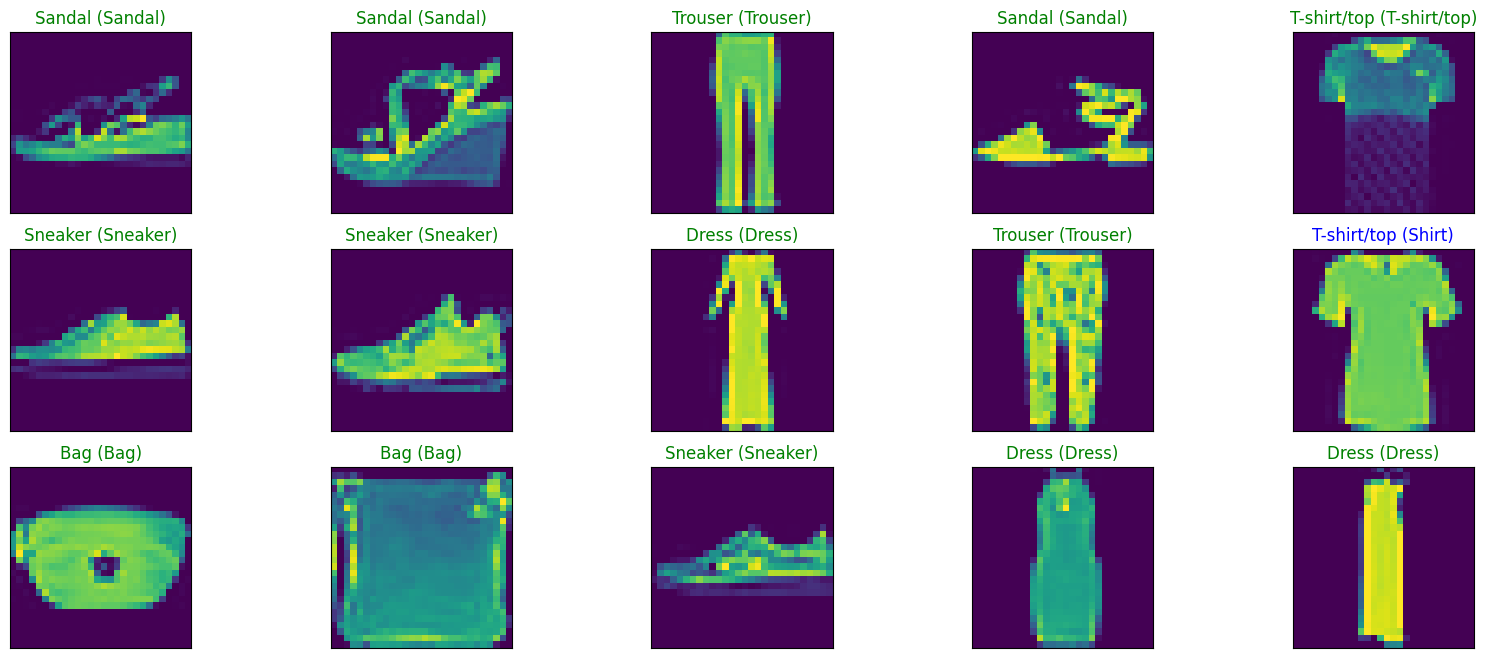

In [22]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])

    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "blue"))